In [6]:
import pandas as pd
import numpy as np 
import geopandas as gpd
import matplotlib 
from matplotlib import pyplot as plt 
pd.set_option('display.max_columns',None)
import seaborn as sns 
from shapely.geometry import Point, Polygon 


dataset = pd.read_csv('/srv/data/my_shared_data_folder/rafi/2022_Business_Academic_QCQ_grocery.csv')
dataset.drop(['Unnamed: 0'],inplace=True,axis=1)
dataset

,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,LOCATION EMPLOYEE SIZE CODE,LOCATION SALES VOLUME CODE,PRIMARY SIC CODE,SIC6_DESCRIPTIONS,PRIMARY NAICS CODE,NAICS8 DESCRIPTIONS,SIC CODE,SIC6_DESCRIPTIONS (SIC),SIC CODE 1,SIC6_DESCRIPTIONS (SIC1),SIC CODE 2,SIC6_DESCRIPTIONS(SIC2),SIC CODE 3,SIC6_DESCRIPTIONS(SIC3),SIC CODE 4,SIC6_DESCRIPTIONS(SIC4),ARCHIVE VERSION YEAR,YELLOW PAGE CODE,EMPLOYEE SIZE (5) - LOCATION,SALES VOLUME (9) - LOCATION,BUSINESS STATUS CODE,INDUSTRY SPECIFIC FIRST BYTE,YEAR ESTABLISHED,OFFICE SIZE CODE,COMPANY HOLDING STATUS,ABI,SUBSIDIARY NUMBER,PARENT NUMBER,PARENT ACTUAL EMPLOYEE SIZE,PARENT ACTUAL SALES VOLUME,PARENT EMPLOYEE SIZE CODE,PARENT SALES VOLUME CODE,SITE NUMBER,ADDRESS TYPE INDICATOR,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE
0,GOMART,55 POSTAL PLZ,MORGANTOWN,WV,26508,7005.0,61.0,304,2,C,C,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,554101.0,SERVICE STATIONS-GASOLINE & OIL,554110.0,ALTERNATIVE FUELS,NaN,NaN,NaN,NaN,NaN,NaN,2022,21303.0,13.0,2482.0,2,NaN,NaN,NaN,NaN,998372387,NaN,124929449.0,50.0,389500.0,E,I,998372387.0,NaN,7,11000.0,3.0,39.594376,-79.954437,P,34060.0,2.0,390.0,54061.0
1,7-ELEVEN,485 E MAIN ST,EL CENTRO,CA,92243,2619.0,25.0,760,2,B,C,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,554101.0,SERVICE STATIONS-GASOLINE & OIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,6.0,1273.0,2,W,NaN,NaN,NaN,495660326,NaN,5863311.0,800.0,1272634.0,H,K,495660326.0,NaN,7,11400.0,3.0,32.792679,-115.536058,0,20940.0,2.0,0.0,6025.0
2,EL SOL MARKET,110 W MAIN ST,WESTMORLAND,CA,92281,NaN,25.0,760,2,B,C,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,5.0,1061.0,9,NaN,NaN,NaN,NaN,519605455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,10200.0,1.0,33.051800,-115.581800,X,20940.0,2.0,0.0,6025.0
3,COOL SPRINGS GROCERY,241 WILDWOOD ST,MORGANTOWN,WV,26505,3141.0,61.0,304,2,A,A,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,2.0,382.0,9,NaN,NaN,NaN,NaN,817953730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,10400.0,4.0,39.652885,-79.986398,P,34060.0,2.0,390.0,54061.0
4,CIRCLE K,123 E MAIN ST,WESTMORLAND,CA,92281,NaN,25.0,760,2,B,C,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,554101.0,SERVICE STATIONS-GASOLINE & OIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,6.0,1273.0,2,F,NaN,NaN,NaN,855113817,NaN,450720289.0,650.0,4981020.0,H,J,NaN,NaN,3,10200.0,1.0,33.051800,-115.581800,X,20940.0,2.0,0.0,6025.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203498,H-E-B,1434 W WELLS BRANCH PKWY,PFLUGERVILLE,TX,78660,3153.0,453.0,512,2,G,H,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,554101.0,SERVICE STATIONS-GASOLINE & OIL,729954.0,VEHICLE & DRIVERS LICENSING SERVICES,581208.0,RESTAURANTS,NaN,NaN,NaN,NaN,2022,39106.0,270.0,71857.0,2,F,NaN,NaN,NaN,403451198,NaN,436443592.0,1000.0,23000000.0,I,K,403451198.0,NaN,8,1840.0,3.0,30.442331,-97.664580,P,12420.0,2.0,0.0,48453.0
203499,ELECTRIC CHARGING STATION,1A LAKEVIEW DR,HALFMOON,NY,12065,4101.0,91.0,518,2,NaN,NaN,554112,ELECTRIC CHARGING STATION,44719010.0,OTHER GASOLINE STATIONS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,NaN,0.0,9,J,NaN,NaN,NaN,739034319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,62405.0,1.0,42.851508,-73.767767,0,10580.0,2.0,104.0,36091.0
203500,SAC N PAC,2101 N STATE HIGHWAY 123,SAN MARCOS,TX,78666,1441.0,209.0,512,2,A,A,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,541105.0,GROCERS-RETAIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,21303.0,1.0,304.0,2,NaN,NaN,NaN,NaN,898604384,625576871.0,5863311.0,800.0,1272634.0,H,K,729087954.0,NaN,8,10400.0,3.0,29.845163,-97.940228,P,12420.0,2.0

In [7]:
stores_2022 = pd.read_csv('/srv/data/my_shared_data_folder/rafi/2022_Business_Academic_QCQ_grocery.csv')
stores_2022.drop(['Unnamed: 0'],inplace=True,axis=1)
territories = ['PR', 'FM', 'MP', 'GU', 'VI', 'MH']
stores_2022 = stores_2022.drop(stores_2022[stores_2022['STATE'].isin(territories)].index)
stores_2022.head()

,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,LOCATION EMPLOYEE SIZE CODE,LOCATION SALES VOLUME CODE,PRIMARY SIC CODE,SIC6_DESCRIPTIONS,PRIMARY NAICS CODE,NAICS8 DESCRIPTIONS,SIC CODE,SIC6_DESCRIPTIONS (SIC),SIC CODE 1,SIC6_DESCRIPTIONS (SIC1),SIC CODE 2,SIC6_DESCRIPTIONS(SIC2),SIC CODE 3,SIC6_DESCRIPTIONS(SIC3),SIC CODE 4,SIC6_DESCRIPTIONS(SIC4),ARCHIVE VERSION YEAR,YELLOW PAGE CODE,EMPLOYEE SIZE (5) - LOCATION,SALES VOLUME (9) - LOCATION,BUSINESS STATUS CODE,INDUSTRY SPECIFIC FIRST BYTE,YEAR ESTABLISHED,OFFICE SIZE CODE,COMPANY HOLDING STATUS,ABI,SUBSIDIARY NUMBER,PARENT NUMBER,PARENT ACTUAL EMPLOYEE SIZE,PARENT ACTUAL SALES VOLUME,PARENT EMPLOYEE SIZE CODE,PARENT SALES VOLUME CODE,SITE NUMBER,ADDRESS TYPE INDICATOR,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE
0,GOMART,55 POSTAL PLZ,MORGANTOWN,WV,26508,7005.0,61.0,304,2,C,C,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,554101.0,SERVICE STATIONS-GASOLINE & OIL,554110.0,ALTERNATIVE FUELS,NaN,NaN,NaN,NaN,NaN,NaN,2022,21303.0,13.0,2482.0,2,NaN,NaN,NaN,NaN,998372387,NaN,124929449.0,50.0,389500.0,E,I,998372387.0,NaN,7,11000.0,3.0,39.594376,-79.954437,P,34060.0,2.0,390.0,54061.0
1,7-ELEVEN,485 E MAIN ST,EL CENTRO,CA,92243,2619.0,25.0,760,2,B,C,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,554101.0,SERVICE STATIONS-GASOLINE & OIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,6.0,1273.0,2,W,NaN,NaN,NaN,495660326,NaN,5863311.0,800.0,1272634.0,H,K,495660326.0,NaN,7,11400.0,3.0,32.792679,-115.536058,0,20940.0,2.0,0.0,6025.0
2,EL SOL MARKET,110 W MAIN ST,WESTMORLAND,CA,92281,NaN,25.0,760,2,B,C,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,5.0,1061.0,9,NaN,NaN,NaN,NaN,519605455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,10200.0,1.0,33.051800,-115.581800,X,20940.0,2.0,0.0,6025.0
3,COOL SPRINGS GROCERY,241 WILDWOOD ST,MORGANTOWN,WV,26505,3141.0,61.0,304,2,A,A,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,2.0,382.0,9,NaN,NaN,NaN,NaN,817953730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,10400.0,4.0,39.652885,-79.986398,P,34060.0,2.0,390.0,54061.0
4,CIRCLE K,123 E MAIN ST,WESTMORLAND,CA,92281,NaN,25.0,760,2,B,C,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,554101.0,SERVICE STATIONS-GASOLINE & OIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,6.0,1273.0,2,F,NaN,NaN,NaN,855113817,NaN,450720289.0,650.0,4981020.0,H,J,NaN,NaN,3,10200.0,1.0,33.051800,-115.581800,X,20940.0,2.0,0.0,6025.0


In [8]:
stores_2022 = pd.read_csv('/srv/data/my_shared_data_folder/rafi/2022_Business_Academic_QCQ_grocery.csv')
stores_2022.drop(['Unnamed: 0'],inplace=True,axis=1)
territories = ['PR', 'FM', 'MP', 'GU', 'VI', 'MH']
stores_2022 = stores_2022.drop(stores_2022[stores_2022['STATE'].isin(territories)].index)
stores_2022.head()
#Filter Grocery stores by sic (starting with 5411)
grocery_sic = stores_2022.loc[stores_2022[['PRIMARY SIC CODE', 'SIC CODE', 'SIC CODE 1', 'SIC CODE 2', 'SIC CODE 3', 'SIC CODE 4']].astype(str).apply(lambda x: x.str.startswith('5411')).any(axis=1)]
grocery_sic.head()

,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,LOCATION EMPLOYEE SIZE CODE,LOCATION SALES VOLUME CODE,PRIMARY SIC CODE,SIC6_DESCRIPTIONS,PRIMARY NAICS CODE,NAICS8 DESCRIPTIONS,SIC CODE,SIC6_DESCRIPTIONS (SIC),SIC CODE 1,SIC6_DESCRIPTIONS (SIC1),SIC CODE 2,SIC6_DESCRIPTIONS(SIC2),SIC CODE 3,SIC6_DESCRIPTIONS(SIC3),SIC CODE 4,SIC6_DESCRIPTIONS(SIC4),ARCHIVE VERSION YEAR,YELLOW PAGE CODE,EMPLOYEE SIZE (5) - LOCATION,SALES VOLUME (9) - LOCATION,BUSINESS STATUS CODE,INDUSTRY SPECIFIC FIRST BYTE,YEAR ESTABLISHED,OFFICE SIZE CODE,COMPANY HOLDING STATUS,ABI,SUBSIDIARY NUMBER,PARENT NUMBER,PARENT ACTUAL EMPLOYEE SIZE,PARENT ACTUAL SALES VOLUME,PARENT EMPLOYEE SIZE CODE,PARENT SALES VOLUME CODE,SITE NUMBER,ADDRESS TYPE INDICATOR,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE
0,GOMART,55 POSTAL PLZ,MORGANTOWN,WV,26508,7005.0,61.0,304,2,C,C,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,554101.0,SERVICE STATIONS-GASOLINE & OIL,554110.0,ALTERNATIVE FUELS,NaN,NaN,NaN,NaN,NaN,NaN,2022,21303.0,13.0,2482.0,2,NaN,NaN,NaN,NaN,998372387,NaN,124929449.0,50.0,389500.0,E,I,998372387.0,NaN,7,11000.0,3.0,39.594376,-79.954437,P,34060.0,2.0,390.0,54061.0
1,7-ELEVEN,485 E MAIN ST,EL CENTRO,CA,92243,2619.0,25.0,760,2,B,C,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,554101.0,SERVICE STATIONS-GASOLINE & OIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,6.0,1273.0,2,W,NaN,NaN,NaN,495660326,NaN,5863311.0,800.0,1272634.0,H,K,495660326.0,NaN,7,11400.0,3.0,32.792679,-115.536058,0,20940.0,2.0,0.0,6025.0
2,EL SOL MARKET,110 W MAIN ST,WESTMORLAND,CA,92281,NaN,25.0,760,2,B,C,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,5.0,1061.0,9,NaN,NaN,NaN,NaN,519605455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,10200.0,1.0,33.051800,-115.581800,X,20940.0,2.0,0.0,6025.0
3,COOL SPRINGS GROCERY,241 WILDWOOD ST,MORGANTOWN,WV,26505,3141.0,61.0,304,2,A,A,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,2.0,382.0,9,NaN,NaN,NaN,NaN,817953730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,10400.0,4.0,39.652885,-79.986398,P,34060.0,2.0,390.0,54061.0
4,CIRCLE K,123 E MAIN ST,WESTMORLAND,CA,92281,NaN,25.0,760,2,B,C,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,554101.0,SERVICE STATIONS-GASOLINE & OIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,6.0,1273.0,2,F,NaN,NaN,NaN,855113817,NaN,450720289.0,650.0,4981020.0,H,J,NaN,NaN,3,10200.0,1.0,33.051800,-115.581800,X,20940.0,2.0,0.0,6025.0


In [9]:
#Filter Grocery stores by sic (starting with 5411)
grocery_sic = stores_2022.loc[stores_2022[['PRIMARY SIC CODE', 'SIC CODE', 'SIC CODE 1', 'SIC CODE 2', 'SIC CODE 3', 'SIC CODE 4']].astype(str).apply(lambda x: x.str.startswith('5411')).any(axis=1)]
grocery_sic.head()
#Find top ten parent companies
grocery_t10_22 = grocery_sic.groupby('PARENT NUMBER', dropna=False).size().reset_index(name='COUNT')
grocery_t10_22.sort_values('COUNT', ascending=False, inplace=True)
grocery_t10_22.reset_index(drop=True,inplace=True)
# Create other row
other_row = grocery_t10_22.iloc[11:]
other_column = other_row['COUNT'].sum()
# Remove other rows
grocery_t10_22 = grocery_t10_22.iloc[:11]
grocery_t10_22.loc[len(grocery_t10_22)] = ["Other", other_column]
grocery_t10_22['PARENT NUMBER'] = grocery_t10_22['PARENT NUMBER'].astype(str)
grocery_t10_22['Percent'] = grocery_t10_22['COUNT'] / len(grocery_sic) * 100
grocery_t10_22.head(20) 

,PARENT NUMBER,COUNT,Percent
0,nan,77818,49.287773
1,5863311.0,11939,7.561833
2,450720289.0,6814,4.315799
3,5889993.0,4397,2.784938
4,7521503.0,3574,2.263673
5,441412723.0,2499,1.582798
6,5995907.0,2493,1.578997
7,200026573.0,2217,1.404187
8,238136725.0,2105,1.333249
9,714232249.0,1760,1.114735


In [10]:
#Filter Grocery stores by sic (starting with 5411)
grocery_sic = stores_2022.loc[stores_2022[['PRIMARY SIC CODE', 'SIC CODE', 'SIC CODE 1', 'SIC CODE 2', 'SIC CODE 3', 'SIC CODE 4']].astype(str).apply(lambda x: x.str.startswith('5411')).any(axis=1)]
grocery_sic.head()
#Find top ten parent companies
grocery_t10_22 = grocery_sic.groupby('PARENT NUMBER', dropna=False).size().reset_index(name='COUNT')
grocery_t10_22.sort_values('COUNT', ascending=False, inplace=True)
grocery_t10_22.reset_index(drop=True,inplace=True)
# Create other row
other_row = grocery_t10_22.iloc[11:]
other_column = other_row['COUNT'].sum()
# Remove other rows
grocery_t10_22 = grocery_t10_22.iloc[:11]
grocery_t10_22.loc[len(grocery_t10_22)] = ["Other", other_column]
grocery_t10_22['PARENT NUMBER'] = grocery_t10_22['PARENT NUMBER'].astype(str)
grocery_t10_22['Percent'] = grocery_t10_22['COUNT'] / len(grocery_sic) * 100
grocery_t10_22.head(20) 
#trying to add column of the employee number 
EmployeeNumber = grocery_sic['LOCATION EMPLOYEE SIZE CODE']
#EmployeeNumber.append(grocery_sic)
#EmployeeNumber
EmployeeNumber['LOCATION EMPLOYEE SIZE CODE'] = grocery_t10_22['LOCATION EMPLOYEE SIZE CODE']
EmployeeNumber


KeyError: 'LOCATION EMPLOYEE SIZE CODE'

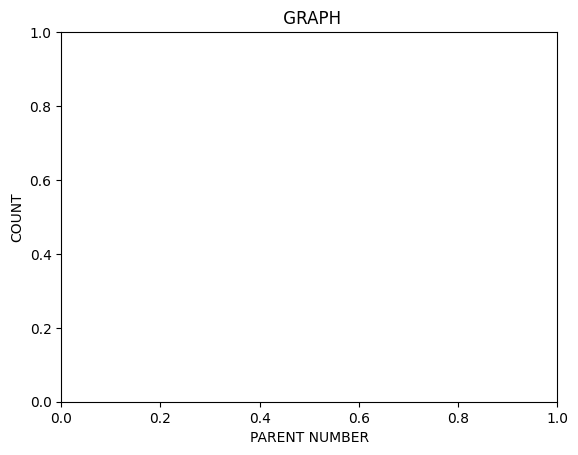

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

#parent number would be on the  x-axis, percentage would be on the y-axis 
PARENTNUMBER = ['nan', '586331.0', '450730389.0', '5889993.0','7521503.0','441412723.0','5995907.0','200026573.0','238136725.0','714232249.0','433922353.0','other']
COUNT = [77818, 11939, 6814, 4397, 3574,2499,2493,2217,2105,1760,1755,40514]

#bar_labels = ['red']
#bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

#ax.bar(fruits, counts, label=bar_labels, color=bar_colors)
ax.set_xlabel('PARENT NUMBER')
ax.set_ylabel('COUNT')
ax.set_title(' GRAPH')
#ax.legend(title='Fruit color')

plt.show()



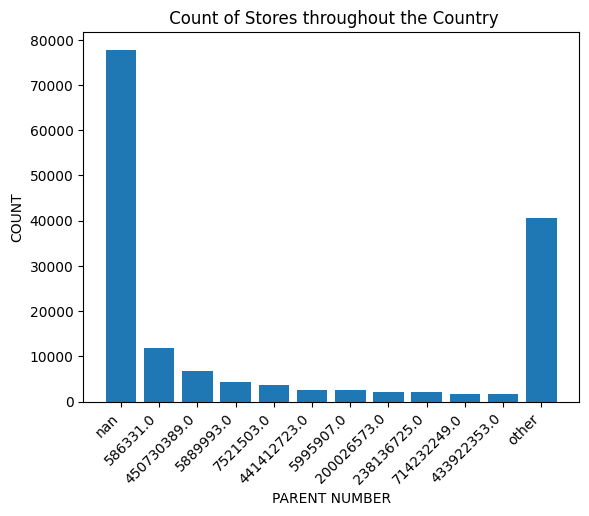

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

#parent number would be on the  x-axis, percentage would be on the y-axis 
PARENTNUMBER = ['nan', '586331.0', '450730389.0', '5889993.0','7521503.0','441412723.0','5995907.0','200026573.0','238136725.0','714232249.0','433922353.0','other']
COUNT = [77818, 11939, 6814, 4397, 3574,2499,2493,2217,2105,1760,1755,40514]

# Add the bar graph
ax.bar(PARENTNUMBER, COUNT)

ax.set_xlabel('PARENT NUMBER')
ax.set_ylabel('COUNT')
ax.set_title(' Count of Stores throughout the Country')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

plt.show()


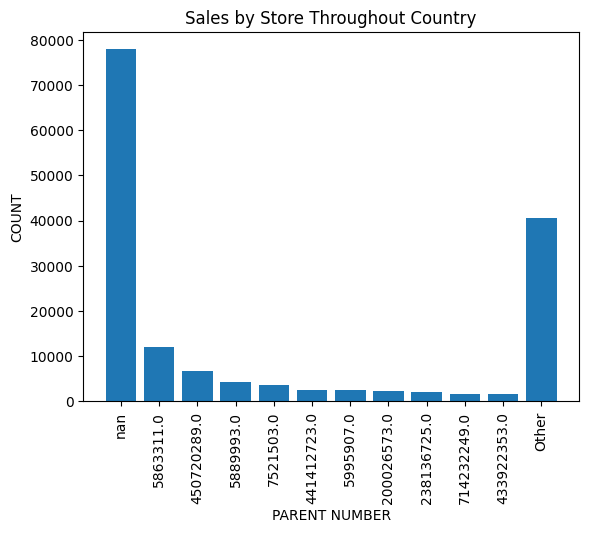

In [14]:
x = grocery_t10_22['PARENT NUMBER']
y = grocery_t10_22['COUNT']



plt.bar(x, y)
plt.xlabel('PARENT NUMBER')
plt.ylabel('COUNT')
plt.title('Sales by Store Throughout Country')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()

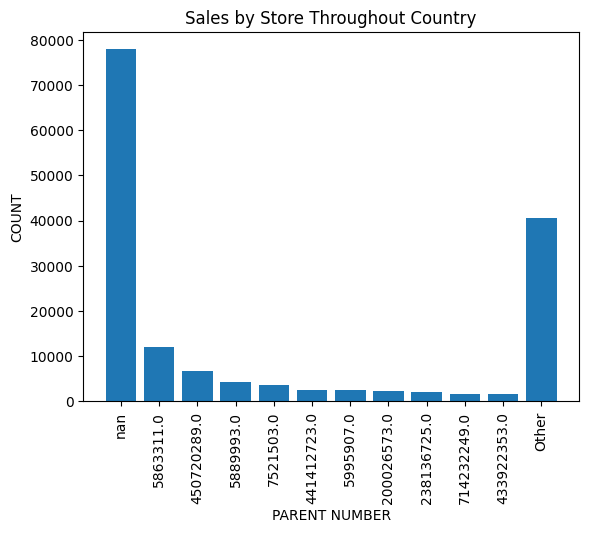

In [15]:
x = grocery_t10_22['PARENT NUMBER']
y = grocery_t10_22['COUNT']


plt.bar(x, y)
plt.xlabel('PARENT NUMBER')
plt.ylabel('COUNT')
plt.title('Sales by Store Throughout Country')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()

In [16]:
dataset.count()

COMPANY                         203491
ADDRESS LINE 1                  203096
CITY                            203503
STATE                           203503
ZIPCODE                         203503
ZIP4                            177600
COUNTY CODE                     203478
AREA CODE                       203503
IDCODE                          203503
LOCATION EMPLOYEE SIZE CODE     156145
LOCATION SALES VOLUME CODE      151918
PRIMARY SIC CODE                203503
SIC6_DESCRIPTIONS               203503
PRIMARY NAICS CODE              199775
NAICS8 DESCRIPTIONS             199775
SIC CODE                         82559
SIC6_DESCRIPTIONS (SIC)          82517
SIC CODE 1                       44804
SIC6_DESCRIPTIONS (SIC1)         44777
SIC CODE 2                       21065
SIC6_DESCRIPTIONS(SIC2)          21053
SIC CODE 3                        7741
SIC6_DESCRIPTIONS(SIC3)           7731
SIC CODE 4                        2769
SIC6_DESCRIPTIONS(SIC4)           2763
ARCHIVE VERSION YEAR     

In [17]:
dataset_group = dataset.groupby(['COMPANY','PARENT NUMBER']).tail().count()
#dataset.drop(columns=['Unnamed: 0'])
dataset_group
#Do a bar chart to see how the market share is divided by parent company 

COMPANY                         8856
ADDRESS LINE 1                  8845
CITY                            8856
STATE                           8856
ZIPCODE                         8856
ZIP4                            7867
COUNTY CODE                     8856
AREA CODE                       8856
IDCODE                          8856
LOCATION EMPLOYEE SIZE CODE     8614
LOCATION SALES VOLUME CODE      7859
PRIMARY SIC CODE                8856
SIC6_DESCRIPTIONS               8856
PRIMARY NAICS CODE              8828
NAICS8 DESCRIPTIONS             8828
SIC CODE                        6004
SIC6_DESCRIPTIONS (SIC)         6002
SIC CODE 1                      3697
SIC6_DESCRIPTIONS (SIC1)        3693
SIC CODE 2                      1869
SIC6_DESCRIPTIONS(SIC2)         1866
SIC CODE 3                       754
SIC6_DESCRIPTIONS(SIC3)          754
SIC CODE 4                       322
SIC6_DESCRIPTIONS(SIC4)          322
ARCHIVE VERSION YEAR            8856
YELLOW PAGE CODE                4699
E

In [18]:
StateData = dataset.groupby(['STATE','PARENT NUMBER']).count()
#StateData = df[df['STATE'] == 'GA']
StateData


COMPANY  ADDRESS LINE 1  CITY  ZIPCODE  ZIP4  \
STATE PARENT NUMBER                                                 
AK    5863311.0           25              25    25       25    21   
      5889993.0            6               6     6        6     6   
      5995907.0           22              22    22       22    19   
      7521503.0           12              12    12       12    11   
      400080801.0          1               1     1        1     0   
...                      ...             ...   ...      ...   ...   
WY    850307737.0          1               1     1        1     1   
      885216069.0          2               2     2        2     1   
      886012012.0          1               1     1        1     1   
      891525875.0          3               3     3        3     3   
      905376588.0          4               4     4        4     4   

                     COUNTY CODE  AREA CODE  IDCODE  \
STATE PARENT NUMBER                                   
AK    5863311.0               25         25      25   
      5889993.0                6          6       6   
      5995907.0               22         22      22   
      7521503.0               12         12      12   
      400080801.0              1          1       1   
...                          ...        ...     ...   
WY    850307737.0              1          1       1   
      885216069.0              2          2       2   
      886012012.0              1          1       1   
      891525875.0              3          3       3   
      905376588.0              4          4       4   

                     LOCATION EMPLOYEE SIZE CODE  LOCATION SALES VOLUME CODE  \
STATE PARENT NUMBER                                                            
AK    5863311.0                               24                          24   
      5889993.0                                6                           5   
      5995907.0                               22                          22   
      7521503.0                               12                          12   
      400080801.0                              1                           1   
...                                          ...                         ...   
WY    850307737.0                              1                           1   
      885216069.0                              2                           2   
      886012012.0                              1                           1   
      891525875.0                              3                           3   
      905376588.0                              2                           2   

                     PRIMARY SIC CODE  SIC6_DESCRIPTIONS  PRIMARY NAICS CODE  \
STATE PARENT NUMBER                                                            
AK    5863311.0                    25                 25                  25   
      5889993.0                     6                  6                   0   
      5995907.0                    22                 22                  22   
      7521503.0                    12                 12                  12   
      400080801.0                   1                  1                   1   
...                               ...                ...                 ...   
WY    850307737.0                   1                  1                   1   
      885216069.0                   2                  2                   2   
      886012012.0                   1                  1                   1   
      891525875.0                   3                  3                   3   
      905376588.0                   4                  4                   4   

                     NAICS8 DESCRIPTIONS  SIC CODE  SIC6_DESCRIPTIONS (SIC)  \
STATE PARENT NUMBER                                                           
AK    5863311.0                       25        24                       24   
      5889993.0                        0         1                        1   
      599

In [ ]:
StateData = dataset.groupby(['STATE']).count()
plt.figure(figsize=(17,6))
plt.bar(StateData[STATE],StateData[PARENTNUMBER])
plt.title('Grocery Stores By State')
plt.xlabel('STATE')
plt.ylabel('PARENT NUMBER')
plt.show()

In [19]:
GroceryStoresInGA = StateData.groupby('COMPANY')
GroceryStoresInGA

In [20]:


#Filter Grocery stores by sic (starting with 5411)
grocery_sic = stores_2022.loc[stores_2022[['PRIMARY SIC CODE', 'SIC CODE', 'SIC CODE 1', 'SIC CODE 2', 'SIC CODE 3', 'SIC CODE 4']].astype(str).apply(lambda x: x.str.startswith('5411')).any(axis=1)]
grocery_sic.head()
#Find top ten parent companies
grocery_t10_22 = grocery_sic.groupby('PARENT NUMBER', dropna=False).size().reset_index(name='COUNT')
grocery_t10_22.sort_values('COUNT', ascending=False, inplace=True)
grocery_t10_22.reset_index(drop=True,inplace=True)
# Create other row
other_row = grocery_t10_22.iloc[11:]
other_column = other_row['COUNT'].sum()
# Remove other rows
grocery_t10_22 = grocery_t10_22.iloc[:11]
grocery_t10_22.loc[len(grocery_t10_22)] = ["Other", other_column]
grocery_t10_22['PARENT NUMBER'] = grocery_t10_22['PARENT NUMBER'].astype(str)
grocery_t10_22['Percent'] = grocery_t10_22['COUNT'] / len(grocery_sic) * 100
grocery_t10_22.head(20) 

,PARENT NUMBER,COUNT,Percent
0,nan,77818,49.287773
1,5863311.0,11939,7.561833
2,450720289.0,6814,4.315799
3,5889993.0,4397,2.784938
4,7521503.0,3574,2.263673
5,441412723.0,2499,1.582798
6,5995907.0,2493,1.578997
7,200026573.0,2217,1.404187
8,238136725.0,2105,1.333249
9,714232249.0,1760,1.114735


In [21]:
#Filter Grocery stores by sic (starting with 5411)
grocery_sic = stores_2022.loc[stores_2022[['PRIMARY SIC CODE', 'SIC CODE', 'SIC CODE 1', 'SIC CODE 2', 'SIC CODE 3', 'SIC CODE 4']].astype(str).apply(lambda x: x.str.startswith('5411')).any(axis=1)]
grocery_sic.head()
#Find top ten parent companies
grocery_t10_22 = grocery_sic.groupby('PARENT NUMBER', dropna=False).size().reset_index(name='COUNT')
grocery_t10_22.sort_values('COUNT', ascending=False, inplace=True)
grocery_t10_22.reset_index(drop=True,inplace=True)
# Create other row
other_row = grocery_t10_22.iloc[11:]
other_column = other_row['COUNT'].sum()
# Remove other rows
grocery_t10_22 = grocery_t10_22.iloc[:11]
grocery_t10_22.loc[len(grocery_t10_22)] = ["Other", other_column]
grocery_t10_22['PARENT NUMBER'] = grocery_t10_22['PARENT NUMBER'].astype(str)
grocery_t10_22['Percent'] = grocery_t10_22['COUNT'] / len(grocery_sic) * 100
grocery_t10_22.head(20) 



,PARENT NUMBER,COUNT,Percent
0,nan,77818,49.287773
1,5863311.0,11939,7.561833
2,450720289.0,6814,4.315799
3,5889993.0,4397,2.784938
4,7521503.0,3574,2.263673
5,441412723.0,2499,1.582798
6,5995907.0,2493,1.578997
7,200026573.0,2217,1.404187
8,238136725.0,2105,1.333249
9,714232249.0,1760,1.114735


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (12,) and arg 1 with shape (202478,).

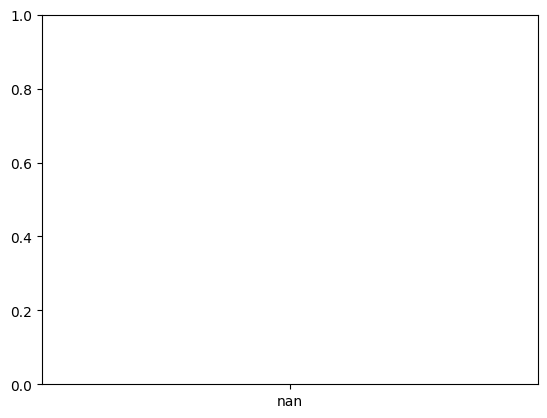

In [22]:
x = grocery_t10_22['PARENT NUMBER']
y = stores_2022['PARENT ACTUAL SALES VOLUME']



plt.bar(x,y)
plt.xlabel('PARENT NUMBER')
plt.ylabel('PARENT ACTUAL SALES VOLUME')
plt.title('Sales by Store Throughout Country')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()


In [23]:
IL_SIC3 = grocery_sic[(grocery_sic['PARENT NUMBER']== 5995907.0) & (grocery_sic['STATE'] == 'IL')]
IL_SIC3


,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,LOCATION EMPLOYEE SIZE CODE,LOCATION SALES VOLUME CODE,PRIMARY SIC CODE,SIC6_DESCRIPTIONS,PRIMARY NAICS CODE,NAICS8 DESCRIPTIONS,SIC CODE,SIC6_DESCRIPTIONS (SIC),SIC CODE 1,SIC6_DESCRIPTIONS (SIC1),SIC CODE 2,SIC6_DESCRIPTIONS(SIC2),SIC CODE 3,SIC6_DESCRIPTIONS(SIC3),SIC CODE 4,SIC6_DESCRIPTIONS(SIC4),ARCHIVE VERSION YEAR,YELLOW PAGE CODE,EMPLOYEE SIZE (5) - LOCATION,SALES VOLUME (9) - LOCATION,BUSINESS STATUS CODE,INDUSTRY SPECIFIC FIRST BYTE,YEAR ESTABLISHED,OFFICE SIZE CODE,COMPANY HOLDING STATUS,ABI,SUBSIDIARY NUMBER,PARENT NUMBER,PARENT ACTUAL EMPLOYEE SIZE,PARENT ACTUAL SALES VOLUME,PARENT EMPLOYEE SIZE CODE,PARENT SALES VOLUME CODE,SITE NUMBER,ADDRESS TYPE INDICATOR,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE
5161,JEWEL-OSCO,16 S WAUKEGAN RD,DEERFIELD,IL,60015,5216.0,31.0,847,2,E,G,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,546102.0,BAKERS-RETAIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,90.0,23000.0,2,M,NaN,NaN,NaN,306364910,23119.0,5995907.0,800.0,NaN,H,NaN,306364910.0,NaN,7,801500.0,1.0,42.151799,-87.837363,P,16980.0,2.0,176.0,17031.0
5279,JEWEL-OSCO,800 NORTHWEST HWY # 14,FOX RIVER GROVE,IL,60021,1208.0,111.0,847,2,F,H,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,591205.0,PHARMACIES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,200.0,51845.0,2,M,NaN,NaN,NaN,436738993,23119.0,5995907.0,800.0,NaN,H,NaN,436738993.0,NaN,5,871402.0,3.0,42.195350,-88.209897,P,16980.0,2.0,176.0,17111.0
6579,JEWEL-OSCO,345 S RAND RD,LAKE ZURICH,IL,60047,2271.0,97.0,847,2,F,H,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,591205.0,PHARMACIES,609910.0,MONEY TRANSFER SERVICE,804939.0,PHARMACISTS,NaN,NaN,NaN,NaN,2022,NaN,200.0,54846.0,2,M,NaN,NaN,NaN,705479853,23119.0,5995907.0,800.0,NaN,H,NaN,705479853.0,NaN,7,864408.0,3.0,42.191712,-88.110099,P,16980.0,2.0,176.0,17097.0
6690,JEWEL-OSCO,1340 PATRIOT BLVD,GLENVIEW,IL,60026,7777.0,31.0,847,2,F,H,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,200.0,51110.0,2,M,NaN,NaN,NaN,700233144,23119.0,5995907.0,800.0,NaN,H,NaN,700233144.0,NaN,6,802300.0,1.0,42.078560,-87.818822,P,16980.0,2.0,176.0,17031.0
8787,JEWEL-OSCO,2203 E OAKLAND AVE,BLOOMINGTON,IL,61701,5760.0,113.0,309,2,F,H,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,200.0,55562.0,2,M,NaN,NaN,NaN,427996134,23119.0,5995907.0,800.0,NaN,H,NaN,427996134.0,NaN,7,5800.0,1.0,40.472303,-88.960278,P,14010.0,2.0,145.0,17113.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199610,JEWEL-OSCO,370 N DESPLAINES ST,CHICAGO,IL,60661,1106.0,31.0,312,2,F,G,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,150.0,38333.0,2,M,NaN,NaN,NaN,643278203,23119.0,5995907.0,800.0,NaN,H,NaN,643278203.0,NaN,5,842300.0,2.0,41.888342,-87.645057,P,16980.0,2.0,176.0,17031.0
199798,JEWEL-OSCO,1763 W HOWARD ST,CHICAGO,IL,60626,1626.0,31.0,773,2,F,H,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,200.0,51110.0,2,M,NaN,NaN,NaN,705501147,23119.0,5995907.0,800.0,NaN,H,NaN,705501147.0,NaN,8,10202.0,1.0,42.019372,-87.675184,4,16980.0,2.0,176.0,17031.0
200464,JEWEL-OSCO,2520 N NARRAGANSETT AVE,CHICAGO,IL,60639,1041.0,31.0,773,2,F,H,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,200.0,51110.0,2,M,NaN,NaN,NaN,427743916,23119.0,5995907.0,800.0,NaN,H,Na

In [24]:
il = grocery_sic.loc[grocery_sic["STATE"] == 'IL']
il.loc[il["PARENT NUMBER"] == 238136725.0]

,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,LOCATION EMPLOYEE SIZE CODE,LOCATION SALES VOLUME CODE,PRIMARY SIC CODE,SIC6_DESCRIPTIONS,PRIMARY NAICS CODE,NAICS8 DESCRIPTIONS,SIC CODE,SIC6_DESCRIPTIONS (SIC),SIC CODE 1,SIC6_DESCRIPTIONS (SIC1),SIC CODE 2,SIC6_DESCRIPTIONS(SIC2),SIC CODE 3,SIC6_DESCRIPTIONS(SIC3),SIC CODE 4,SIC6_DESCRIPTIONS(SIC4),ARCHIVE VERSION YEAR,YELLOW PAGE CODE,EMPLOYEE SIZE (5) - LOCATION,SALES VOLUME (9) - LOCATION,BUSINESS STATUS CODE,INDUSTRY SPECIFIC FIRST BYTE,YEAR ESTABLISHED,OFFICE SIZE CODE,COMPANY HOLDING STATUS,ABI,SUBSIDIARY NUMBER,PARENT NUMBER,PARENT ACTUAL EMPLOYEE SIZE,PARENT ACTUAL SALES VOLUME,PARENT EMPLOYEE SIZE CODE,PARENT SALES VOLUME CODE,SITE NUMBER,ADDRESS TYPE INDICATOR,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE


In [ ]:
#FINDS IL employee size per parent company 
groc_emp_il = il.groupby('PARENT NUMBER', dropna=False).sum().reset_index()[['PARENT NUMBER','EMPLOYEE SIZE (5) - LOCATION']]
groc_emp_il.sort_values('EMPLOYEE SIZE (5) - LOCATION', ascending=False, inplace=True)
groc_emp_il.reset_index(drop=True,inplace=True)
groc_emp_il['PARENT NUMBER'] = groc_emp_il['PARENT NUMBER'].astype('str')

test = groc_emp_il.head(10)

In [ ]:
test

In [ ]:
x = test['PARENT NUMBER']
y = test['EMPLOYEE SIZE (5) - LOCATION']
# Fill missing values with a constant
x

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (12,) and arg 1 with shape (202478,).

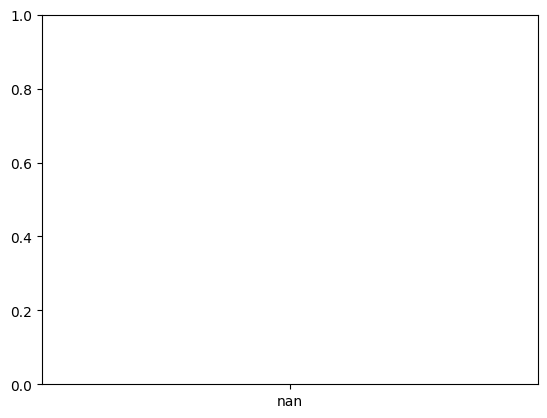

In [29]:
#x = groc_emp_il['PARENT NUMBER']
#y = groc_emp_il['EMPLOYEE SIZE (5) - LOCATION']
# Fill missing values with a constant


#plotting the data
plt.bar(x, y)
plt.xlabel('PARENT NUMBER')
plt.ylabel('EMPLOYEE SIZE (5) - LOCATION')
plt.title('Employee Size by Store Throughout Country')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()


#checking to see if the data types were the same 
'''print(groc_emp_il.dtypes)'''


In [ ]:
y

In [28]:
# top 10 parent companies, with amount of 

groc_il = il.groupby('PARENT NUMBER', dropna=False).count().reset_index()[['PARENT NUMBER','COMPANY']]
groc_il.sort_values('COMPANY', ascending=False, inplace=True)
groc_il.reset_index(drop=True,inplace=True)

groc_tp10_il = groc_il.iloc[:11]
other_groc = groc_il['COMPANY'].sum() - groc_tp10_il['COMPANY'].sum()

# groc_tp10_il.iloc[11, :] = {'PARENT NUMBER': 'Other', 'COMPANY': other_groc}

groc_tp10_il.loc[len(groc_tp10_il.index)] = ["Other", other_groc]
groc_tp10_il['PARENT NUMBER'] = groc_tp10_il['PARENT NUMBER'].astype(str)
groc_tp10_il.loc[:, 'Percent'] = groc_tp10_il.loc[:, 'COMPANY'] / len(il) * 100
#len(il)
groc_tp10_il.rename(columns={"COMPANY":"COUNT"})
#il.head()

/tmp/ipykernel_881492/596744763.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  groc_tp10_il.loc[len(groc_tp10_il.index)] = ["Other", other_groc]
/tmp/ipykernel_881492/596744763.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  groc_tp10_il['PARENT NUMBER'] = groc_tp10_il['PARENT NUMBER'].astype(str)
/tmp/ipykernel_881492/596744763.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

,PARENT NUMBER,COUNT,Percent
0,nan,2236,43.074552
1,441412723.0,525,10.113658
2,5863311.0,446,8.591793
3,450720289.0,329,6.337893
4,200026573.0,221,4.257369
5,5995907.0,189,3.640917
6,5889993.0,134,2.581391
7,7521503.0,122,2.350222
8,1490291.0,89,1.714506
9,723360636.0,68,1.309960


In [ ]:
il

In [27]:
#FINDS IL employee size per parent company 
groc_sales_il = il.groupby('PARENT NUMBER', dropna=False).sum().reset_index()[['PARENT NUMBER','PARENT ACTUAL SALES VOLUME']]
groc_sales_il.sort_values('PARENT ACTUAL SALES VOLUME', ascending=False, inplace=True)
groc_sales_il.reset_index(drop=True,inplace=True)

groc_sales_il.head(10)

groc_sales_il['PARENT NUMBER'] = top10_sales_il['PARENT NUMBER'].astype('str') 

top10_sales_il = groc_sales_il.head(10)

NameError: name 'top10_sales_il' is not defined

In [26]:
groc_sales_il.head(30)


NameError: name 'groc_sales_il' is not defined

In [25]:
#changes the Parent number into a catergory
#top10_sales_il['PARENT NUMBER'] = top10_sales_il['PARENT NUMBER'].astype('str')   

x = top10_sales_il['PARENT NUMBER']
y = top10_sales_il['PARENT ACTUAL SALES VOLUME']
# Fill missing values with a constant

#plotting the data
plt.bar(x, y)
plt.xlabel('PARENT NUMBER')
plt.ylabel('PARENT ACTUAL SALES VOLUME')
plt.title('Company Sales Throughout Country')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()

NameError: name 'top10_sales_il' is not defined

In [12]:
# creating a list
Walmart_Owned_Stores = ['Asda','Jet','Massmart','Bare necessities',
'Vudu','Equate','Moosejaw','Eloquii','ModCloth','Flipkart','Subsidiary','Parcel'
]
#most the stores owned by walmart aren't grocery stores
#walmart inc isn't exclusively a grocery store, they contain clothing, etc




Costco_Owned_Stores = ['Kirkland Signature','Starbucks Coffee','Perrigo','Zanetti','Duracell','Bumble Bee','Keurig','Niagara Bottling','Jelly Belly','Sonova','Grey Goose Vodka'
]
#most of these aren't grocery stores




Kroger_Owned_Store = ['City Market','Dillons','Food 4 Less','Foods Co','Fred Meyer','Frys','Gerbes','Jay C Food Store','King Soopers','Kroger','Metro Market','Pay-Less Super Markets','QFC','Ralphs','Ruler','Bakers','Pay-less Super Markets,','Pickn Save','QFC','Ralphs','Ruler Food','Smiths Food and Drug']

#all of these are grocery stores
#some of these contain 's in the name but I didn't include it
#those are baker's,fry's,& Mariano's, Pickn' Save, Smith's Food and Drug



Albertsons_Owned_Stores= ['Safeway','Tom Thumb','Randalls','Carrs','Vons','Carrs-Safeway','Pavillions','United Supermarkets','Shaw’s','Plated','Jewel-Osco','Acme Markets','Star Market','Haggen']
#Plated is a meal kit service
#balducci's,Shaw's, don't have the '
print(Kroger_Owned_Store)


['City Market', 'Dillons', 'Food 4 Less', 'Foods Co', 'Fred Meyer', 'Frys', 'Gerbes', 'Jay C Food Store', 'King Soopers', 'Kroger', 'Metro Market', 'Pay-Less Super Markets', 'QFC', 'Ralphs', 'Ruler', 'Bakers', 'Pay-less Super Markets,', 'Pickn Save', 'QFC', 'Ralphs', 'Ruler Food', 'Smiths Food and Drug']
